# Sentiment Analysis

## Data

We used a dataset from data.world provided by CrowdFlower which contains 9,093 tweets about Apple and Google from the South by Southwest (SXSW) Conference. The tweet labels were crowdsourced and reflect which emotion they convey and what product/service/company this emotion is directed at based on the content.

In [1]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import nltk
from wordcloud import WordCloud
from textblob import TextBlob
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [2]:
# Read in the file with the correct encoding
data = pd.read_csv('brandandproductemotions.csv', encoding='latin1')

# Display the first few rows of the data
data.head(60)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [3]:
# Rename the columns of the data DataFrame
data.columns = ['tweet', 'brand/product', 'target']
data.head()

,tweet,brand/product,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
data['target'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [5]:
data['target'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: target, dtype: int64

In [6]:
emotions = {'Negative emotion': 'negative','Positive emotion':'positive','No emotion toward brand or product':'neutral', 'I cant tell':'unknown'}

data['target'] = data['target'].map(emotions)

# Display the updated dataframe
data.head(100)

,tweet,brand/product,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive
...,...,...,...
95,XMAS!! RT @mention Shiny new @mention @mention...,iPad,positive
96,Yai!!! RT @mention New #UberSocial for #iPhone...,iPhone,positive
97,"Yes!!! RT @mention hey @mention , i've got ano...",NaN,neutral
98,"Fast, Fun &amp; Future: @mention of Google pre...",Google,positive


In [7]:
#emotion percentage
data.target.value_counts() / len(data)

neutral     0.592654
positive    0.327505
negative    0.062686
Name: target, dtype: float64

In [8]:
#how long is the longest review?
length_tweet = data.tweet.str.len()
print(f'longest review {length_tweet.max()}')
print(f'shortest review {length_tweet.min()}')

longest review 178.0
shortest review 11.0


In [9]:
data['brand/product'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [10]:
data['brand/product'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: brand/product, dtype: int64

In [11]:
data.isna().sum()

tweet               1
brand/product    5802
target            156
dtype: int64

In [12]:
# Remove one missing value for the independent feature and any duplicates
data = data.dropna(subset=['tweet']).drop_duplicates(subset=['tweet'])

In [13]:
# Drop values for "cannot tell"
data = data.drop((data.loc[data['target']=="I can't tell"]).index)

In [14]:
# Group products by Apple and Google brands
apple = ['iPad', 'Apple', 'iPad or iPhone App', 'iPhone', 'Other Apple product or service']
google = ['Google', 'Other Google product or service', 'Android App', 'Android']

data['brand'] = data['brand/product'].apply(lambda x: 'google' if x in google else ('apple' if x in apple else 'unknown'))

In [15]:
pd.DataFrame(data.groupby(['brand', 'target'])['tweet'])

,0,1
0,"(apple, negative)",0 .@wesley83 I have a 3G iPhone. After 3...
1,"(apple, neutral)",63 #Smile RT @mention I think Apple's &qu...
2,"(apple, positive)",1 @jessedee Know about @fludapp ? Awesom...
3,"(google, negative)",38 @mention - False Alarm: Google Circle...
4,"(google, neutral)",558 haha. the google &quot;Party like it's...
5,"(google, positive)",4 @sxtxstate great stuff on Fri #SXSW: M...
6,"(unknown, negative)",64 Again? RT @mention Line at the Apple s...
7,"(unknown, neutral)",5 @teachntech00 New iPad Apps For #Speec...
8,"(unknown, positive)",46 Hand-Held Û÷HoboÛª: Drafthouse launc...


In [16]:
emotions = {'neutral':1, 'positive':2, 'negative':0}
data['target'] = data['target'].map(emotions)

In [17]:
# Create features for length of tweet by word count and by character
data['length'] = data['tweet'].apply(lambda x: len(x.split()))
data['characters'] = data['tweet'].apply(lambda x: len(x))

In [18]:
data.head(100)

,tweet,brand/product,target,brand,length,characters
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0.0,apple,23,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,2.0,apple,22,139
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,2.0,apple,15,79
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0.0,apple,15,82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,2.0,google,17,131
...,...,...,...,...,...,...
96,Yai!!! RT @mention New #UberSocial for #iPhone...,iPhone,2.0,apple,20,122
97,"Yes!!! RT @mention hey @mention , i've got ano...",NaN,1.0,unknown,18,101
98,"Fast, Fun &amp; Future: @mention of Google pre...",Google,2.0,google,15,90
99,GSD&amp;M &amp; Google's Industry Party Tonigh...,NaN,1.0,unknown,16,110


In [19]:
data['brand'].value_counts()

unknown    5785
apple      2402
google      878
Name: brand, dtype: int64

In [20]:
data['is_retweet'] = data['tweet'].astype(str).apply(lambda x: x[:2]=='RT')
data['is_retweet'].value_counts()

False    7107
True     1958
Name: is_retweet, dtype: int64

In [23]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", str(i))
        hashtags.append(ht)

    return hashtags

ht = hashtag_extract(data)


[[], [], [], [], [], [], []]

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

X = data['tweet']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [24]:
stopwords = nltk.corpus.stopwords.words('english')

In [30]:
# Create a function that compiles all the steps taken above
def preprocess(text):
    '''
    Processes text data by basic cleaning, tokenization, lemmatization, and stopwords removal.
    '''
    text = text.apply(lambda x: x.lower())
    text = text.apply(lambda x: re.sub(r'([^A-Za-z0-9|\s|[:punct:]]*)', '', x))
    text = text.apply(lambda x: x.replace('[^a-zA-Z#]', ' ').replace('quot', '').replace(':', '').replace('sxsw', ''))
    text = text.apply(lambda x: ' '.join([i for i in x.split() if len(i)>3]))
    text = text.apply(lambda x: x.split())
    text = text.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    text = text.apply(lambda x: [word for word in x if word not in stopwords])
    text = text.apply(lambda x: ' '.join(x))
    return text

In [31]:
X_train_pro = preprocess(X_train)
X_test_pro = preprocess(X_test)

In [32]:
X_train_pro.head()

1670    apple classiest fascist company america say me...
3561    crowley really want ipad havent time checkins ...
8487         well austin place ipad apparently austinwins
8259    biggest mistake since south southwest last yea...
2170    creature habit google found ctrs blue link out...
Name: tweet, dtype: object

In [43]:
X_test_pro.head()

3617    wonder apple intentionally scheduled ipad2 rel...
2486    stay tuned mention next emergency ipad station...
3162    next serv battle apple goog mobile operator co...
5893    mention google launch major social network cal...
3080    killer meet friend today apple microsoft solo ...
Name: tweet, dtype: object

In [40]:
cv = CountVectorizer(stop_words='english')

words = cv.fit_transform(X_train_pro)
sumwords = words.sum(axis=0)

frequencies = [(word.title(), sumwords[0,i]) for word, i in cv.vocabulary_.items()]
frequencies = sorted(frequencies, key=lambda x: x[1], reverse=True)

dffrequencies = pd.DataFrame(frequencies, columns=['word', 'frequency'])

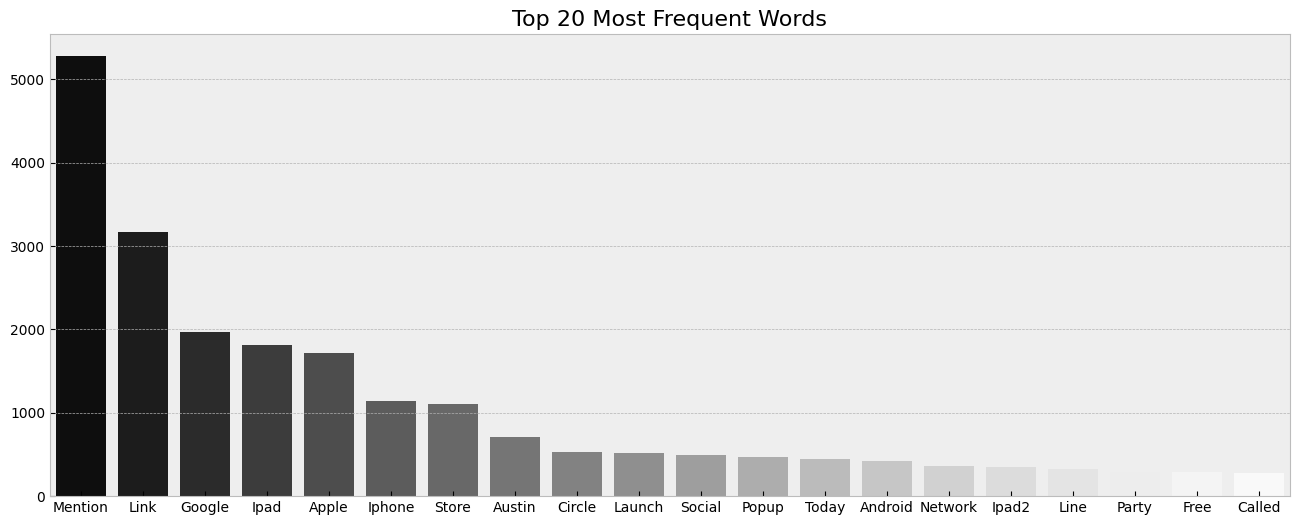

In [41]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(16,6))

sns.barplot(x='word', y='frequency', data=dffrequencies.head(20), palette='Greys_r')
ax.set_title('Top 20 Most Frequent Words', fontsize=16)
ax.set(xlabel=None, ylabel=None)

plt.show()

# Positive Tweets

In [17]:
#positve tweets
positive_data = data[data['target'] == 'positive']
corpus_positive = positive_data['tweet'].to_list()

In [18]:
corpus_positive[:1]

["@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"]

In [19]:
from nltk import TweetTokenizer
import string

def tokenize_tweets(corpus,preserve_case=False,strip_handles=True):
    tokenizer = TweetTokenizer(preserve_case=preserve_case, strip_handles=strip_handles)
    tokens = tokenizer.tokenize(','.join(corpus))
    return tokens

In [20]:
token_positive = tokenize_tweets(corpus_positive)

In [21]:
from nltk import FreqDist
freq = FreqDist(token_positive)
freq.most_common(20)

[(',', 4048),
 ('#sxsw', 2981),
 ('.', 2230),
 ('the', 1590),
 ('!', 1241),
 ('link', 1214),
 ('{', 1210),
 ('}', 1210),
 ('to', 1154),
 ('at', 1019),
 ('ipad', 1008),
 ('rt', 929),
 ('for', 906),
 ('a', 790),
 ('apple', 710),
 ('is', 643),
 ('of', 639),
 ('in', 629),
 ('google', 602),
 ('and', 582)]

In [22]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

#functionize lemmatization of tokens
def lemmatize_tokens(tokens_list):
    """Function lemmatizes tokens list that is passed in by using 
    WordNetLemmatizer and returns lemmatized tokens.
    -------------------------------
    Arguments:
    tokens_list: a tokens list
    """
    lemmatizer = WordNetLemmatizer()
    tokens_lemm = [lemmatizer.lemmatize(word) for word in tokens_list]
    return tokens_lemm

#lemmatizing positive tweet tokens
lem_token_positive = lemmatize_tokens(token_positive)

[nltk_data] Downloading package wordnet to /home/repl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/repl/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [23]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_lst = stopwords.words('english')
stop_lst += list(string.punctuation)
#adding additional characters and empty string to stop words
additional_punc = ['“','”','...',"''",'’','``','']
stop_lst += additional_punc

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
stop_lst += ['#sxsw', '#sxswi', 'sxsw']

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud_tweet = WordCloud().generate(tweet1)
plt.imshow(cloud_tweet, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'tweet1' is not defined

In [27]:
from textblob import TextBlob

tweet1 = data['tweet'].iloc[0]

my_valence = TextBlob(tweet1)

my_valence.sentiment

Sentiment(polarity=-0.25, subjectivity=0.4)

- Rule/Lexicon-baed
- nice:+2, good+1, terrible:-3..etc

- automated systems
- textBlob
- sentiment (polarity is -1 negative, closer to 0 is neutral and close to 1 is positive
-  subjectivity is 0 is objective, 1 is subjective

word_cloud - word size is bigger and bolder for more frequent worms, remove stopwords